In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
# Load the dataset
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


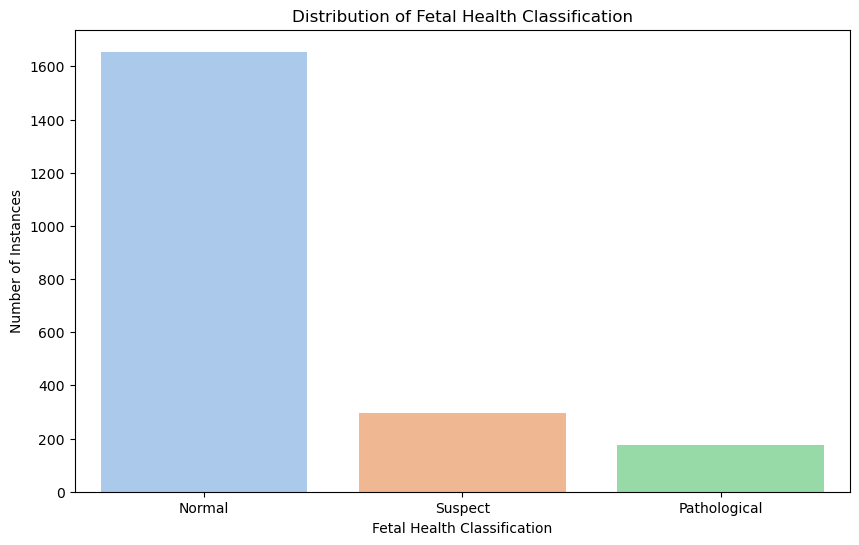

In [16]:
# Visualize the data to discover imbalances
class_counts = df['fetal_health'].value_counts()
class_counts.index = ['Normal', 'Suspect', 'Pathological']

plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='pastel')
plt.title('Distribution of Fetal Health Classification')
plt.ylabel('Number of Instances')
plt.xlabel('Fetal Health Classification')
plt.show()

There is an imbalances in the number of instances for each classification. Normal has many more instances than both suspect and pathological. We will attempt to remedy this by using SMOTE to balance the classes.

In [17]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [18]:
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

fetal_health
2.0    1655
1.0    1655
3.0    1655
Name: count, dtype: int64


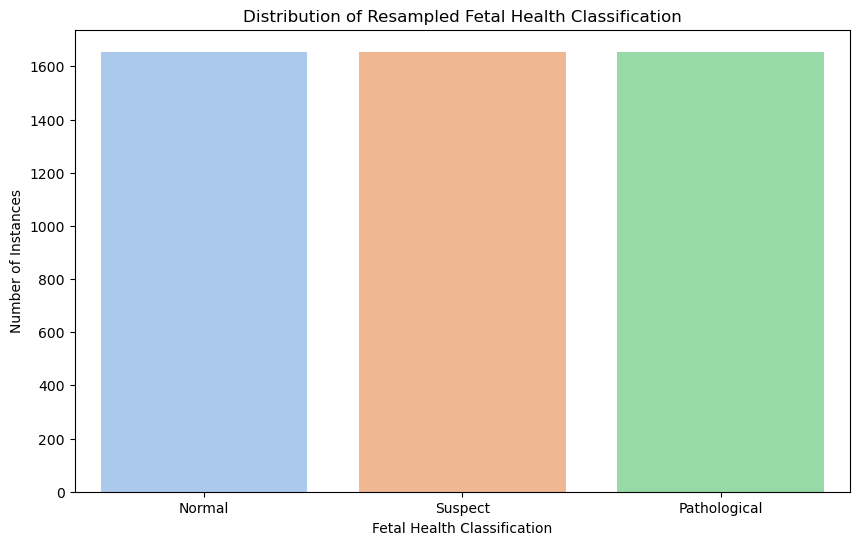

In [19]:
new_y = pd.DataFrame(y_resampled, columns=['fetal_health'])

plt.figure(figsize=(10,6))
sns.countplot(data=new_y, x='fetal_health', order=[1.0, 2.0, 3.0], palette='pastel')
plt.title('Distribution of Resampled Fetal Health Classification')
plt.ylabel('Number of Instances')
plt.xlabel('Fetal Health Classification')
plt.xticks(ticks=[0,1,2], labels=['Normal', 'Suspect', 'Pathological'])
plt.show()

Now the data is balanced and we can proceed without worrying about bias. 